1\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and stardand deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

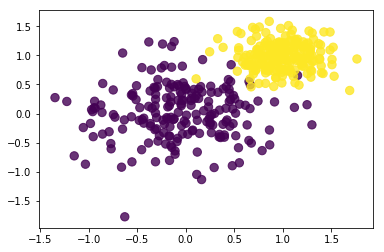

In [18]:
from IPython.display import Image
Image('two_categories_scatter_plot.png')

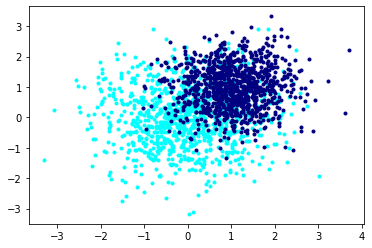

In [19]:
#Exercise 1

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def Gaussians(mean1, cov1, mean2, cov2):

    x,y = np.random.multivariate_normal(mean1, cov1, 1000).T
    plt.scatter(x,y, color = "cyan", marker = ".")

    x,y = np.random.multivariate_normal(mean2, cov2, 1000).T
    plt.scatter(x,y, color = "navy", marker=".")

Gaussians([0,0], [[1,0],[0,1]], [1,1], [[0.5,0],[0,0.5]] )
    

2\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn jointplot of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [20]:
#Exercise 2

import pickle
import seaborn as sns

#!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
#Fatto!

In [21]:
#Inspect the dataset
data=pd.read_pickle("data/residuals_261.pkl")
print(data)

{'residuals': array([ 1.1       , -1.95      , -7.2       , ...,  0.08333333,
        0.16666667,  0.08333333]), 'distances': array([16. ,  6.3,  3.4, ...,  1.7, 19.1,  2.6])}


In [22]:
#Convert the content to a Pandas Dataframe
df=pd.DataFrame(data.item())
df

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
2,-7.200000,3.4
3,-4.150000,8.4
4,-6.590000,1.7
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


In [23]:
#Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
filtered_df = df.copy()[abs(df["residuals"])<2]
filtered_df

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
8,-0.042857,3.3
9,0.128571,5.3
10,0.085714,15.0
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


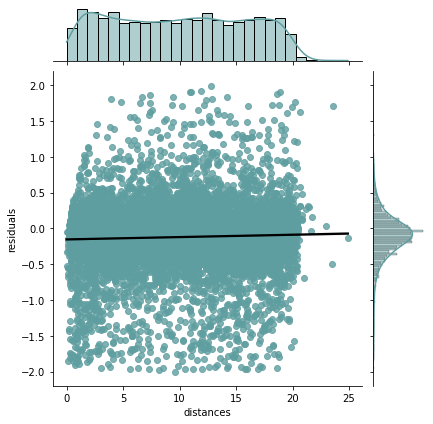

In [24]:
#Plot a Seaborn jointplot of "residuals" versus "distances" and use seaborn to display a linear regression. 
sns.jointplot(x="distances", y="residuals", data=filtered_df, kind = "reg", color="cadetblue", joint_kws={"line_kws":{"color":"black"}})


**Comments to results**

For every distance, residuals follow a gaussian distribution. Distances, instead, are uniformely distributed.

Data are nearly uncorrelated: a really slight positive correlation, though is highlighted by the positive slope of the fit function.

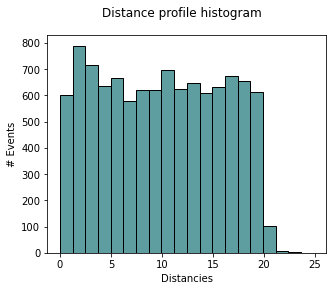

In [25]:
#Create manually the profile histogram for the "distance" variable; choose an appropriate binning
fig = plt.figure(figsize = (5,4))
ax = fig.add_subplot(111)
ax.hist(filtered_df["distances"], bins = 20, color = "cadetblue", edgecolor="black")
fig.suptitle("Distance profile histogram")
ax.set_xlabel("Distancies")
ax.set_ylabel("# Events")
plt.show()

In [26]:
#Obtain 3 numpy arrays:
    #x, the array of bin centers of the profile histogram of the "distance" variable
    #y, the mean values of the "residuals", estimated in slices (bins) of "distance"
    #err_y, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"

n_bin = 20
first = filtered_df["distances"].min()
last = filtered_df["distances"].max()
width_bin = (last -first)/n_bin

x = np.linspace(first + width_bin/2 , last - width_bin/2 , n_bin)

estremi_bin= np.linspace(first, last, n_bin +1)
filtered_df["binned_distances"]=np.digitize(filtered_df["distances"], bins= estremi_bin)
y=filtered_df.groupby("binned_distances")["residuals"].mean()

err_y=filtered_df.groupby("binned_distances")["residuals"].std()


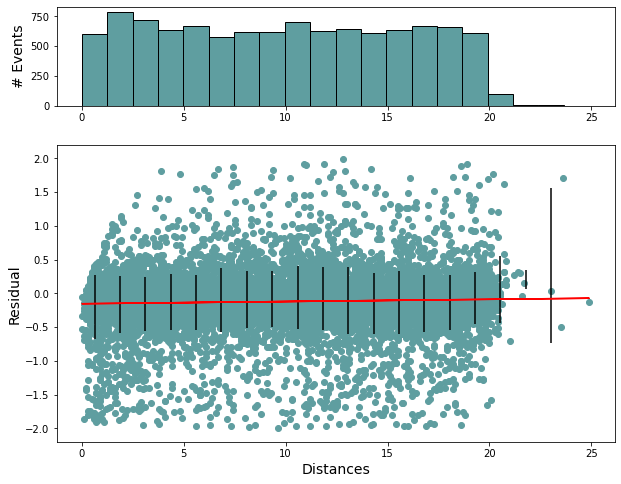

In [27]:
#Plot the profile plot on top of the scatter plot

fig, (ax1, ax2) = plt.subplots(2,1,figsize=(10,8), gridspec_kw={'height_ratios': [1, 3]})

ax1.hist(filtered_df["distances"], bins = 20, color="cadetblue", edgecolor = "black")
ax1.set_ylabel("# Events", fontsize = 14)

ax2.scatter(filtered_df["distances"], filtered_df["residuals"], color = "cadetblue")
ax2.errorbar(x, y, err_y, color = "black", linestyle = "")
ax2.set_xlabel("Distances", fontsize = 14)
ax2.set_ylabel("Residual", fontsize = 14)

from scipy.stats import linregress
m, q, rvalue, pvalue, err=linregress(filtered_df.distances, filtered_df.residuals)
ax2.plot(filtered_df.distances, m*filtered_df.distances+q, color="red")


3\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


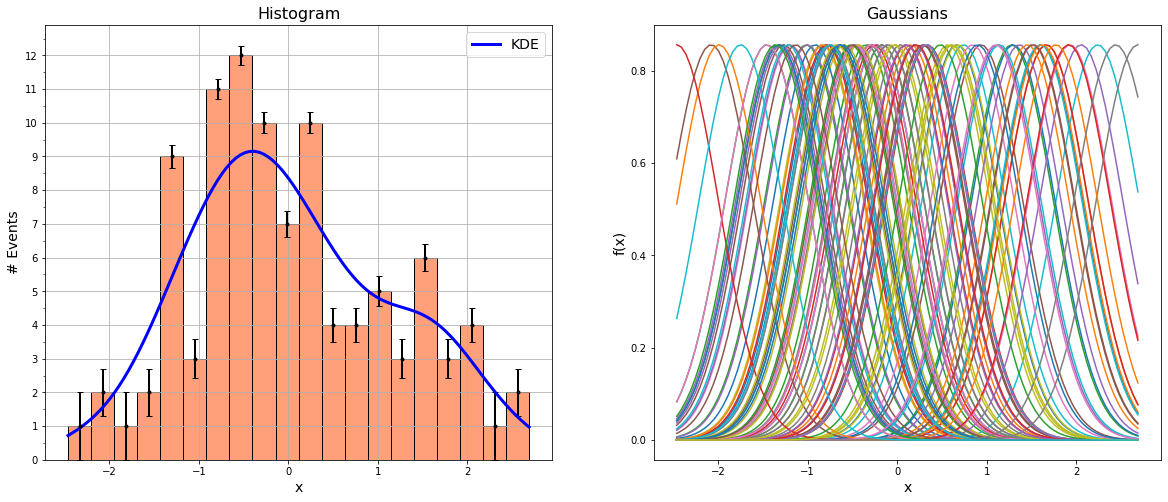

In [28]:
import scipy
from scipy.stats import norm
from matplotlib.ticker import MultipleLocator


# Fill a numpy array x of length N (with 𝑁=O(100)) with a variable normally distributed, with a given mean and standard deviation
N = 100
mean = 0
sigma = 1

x = np.random.normal(mean, sigma, N)

#Structure of the plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,8))

#Fill an histogram in pyplot:
y, bins, patches = ax1.hist(x, bins = 20, color = "lightsalmon", edgecolor = "black") 

#Taking proper care of the aesthetic:
ax1.set_title("Histogram", fontsize = 16)
ax1.set_xlabel("x", fontsize = 14)
ax1.set_ylabel("# Events", fontsize = 14)

ax1.yaxis.set_major_locator(MultipleLocator(1))
ax1.yaxis.set_minor_locator(MultipleLocator(0.5))

bin_centers = 0.5*(bins[1:]+bins[:-1])
err_y = 1/np.sqrt(y)
ax1.errorbar(bin_centers, y, yerr=err_y, fmt = ".k", elinewidth=2 ,capsize=3)

ax1.grid()

# For every element of x, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter
gaussians=[]
vec = np.linspace(x.min(), x.max(), N) 
    
for i in x:
    devstd = 1.06*x.std()*x.size**(-0.2)
    g = norm.pdf(vec, i, devstd) 
    gaussians.append(g)
    #In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
    ax2.plot(vec, g)
ax2.set_title("Gaussians", fontsize = 16)
ax2.set_xlabel("x", fontsize = 14)
ax2.set_ylabel("f(x)", fontsize = 14)

#Sum all the gaussian functions
gaussian_sum = np.sum(gaussians, axis = 0)

#Normalize the result such that the integral matches the integral of the original histogram
norm = np.trapz(np.sum(gaussians,axis=0),vec)/np.trapz(y, x = bin_centers)
normalized_sum = gaussian_sum/norm 

#Superimpose the normalized sum of all gaussians to the first histogram
ax1.plot(vec, normalized_sum, label = "KDE", color = "blue", linewidth = 3)
ax1.legend(fontsize = 14)